In [159]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'font.family': 'sans'})

# Births per year


In [306]:
births = pd.read_csv('CO_total_births_per_year.csv')
births

,Years,Births in Colorado
0,2007,"71,225"
1,2008,"70,525"
2,2009,"69,034"
3,2010,"66,821"
4,2011,"65,511"
5,2012,"65,643"
6,2013,"65,528"
7,2014,"66,377"
8,2015,"67,158"
9,2016,"67,188"


In [308]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Years               13 non-null     int64 
 1   Births in Colorado  13 non-null     object
dtypes: int64(1), object(1)
memory usage: 336.0+ bytes


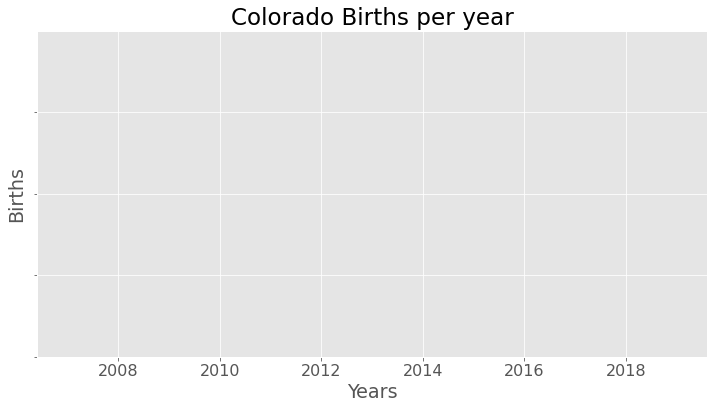

In [304]:
fig, ax = plt.subplots(figsize=(12,6))
x= births['Years'] 
y= births['Births in Colorado']

ax.set_ylim([60000,80000])
ax.yaxis.set_ticks(range(60000,80000,5000)) 
ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Births')
ax.set_title('Colorado Births per year')
plt.show
plt.savefig('co_births_per_year.png')

In [245]:
!pwd


/Users/willsullivan/Documents/SDOH_capstone/data/raw


# PAMR

In [312]:
pamr = pd.read_csv('CU_Anschutz_PAMR_2014-2016.csv')
#pamr = pamr.drop('index',axis=1)
pamr

,index,year,pamr
0,1,2008,24.0
1,2,2009,37.5
2,3,2010,22.3
3,4,2011,56.2
4,5,2012,30.3
5,6,2013,45.6
6,7,2014,52.5
7,8,2015,40.0
8,9,2016,47.4


In [311]:
pamr['pamr'].describe()

count     9.000000
mean     39.533333
std      12.106197
min      22.300000
25%      30.300000
50%      40.000000
75%      47.400000
max      56.200000
Name: pamr, dtype: float64

In [338]:
pamr['pamr'].std()**(1/2)

3.4793960338451333

In [322]:
print(pamr['year'].shape)
print(pamr['pamr'])


(9,)
0    24.0
1    37.5
2    22.3
3    56.2
4    30.3
5    45.6
6    52.5
7    40.0
8    47.4
Name: pamr, dtype: float64


In [327]:
x= pamr['year'].values 
y= pamr['pamr'].values

A = np.vstack([x, np.ones(len(x))]).T
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
line_of_best_fit = m*x+c 
line_of_best_fit

array([29.47333333, 31.98833333, 34.50333333, 37.01833333, 39.53333333,
       42.04833333, 44.56333333, 47.07833333, 49.59333333])

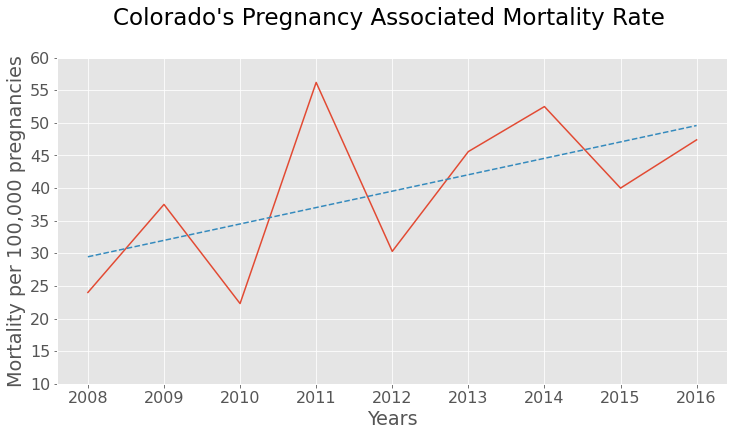

In [331]:
fig, ax = plt.subplots(figsize=(12,6))
x= pamr['year'] 
y= pamr['pamr']
ax.set_ylim([10,60])
ax.yaxis.set_ticks(range(10, 65,5)) 

ax.plot(x,y)
ax.set_xlabel('Years')
ax.set_ylabel('Mortality per 100,000 pregnancies')
ax.set_title("Colorado's Pregnancy Associated Mortality Rate \n")

m, b = np.polyfit(x, y,1)
x= pamr['year'] 
line_of_best_fit = m*x+b
plt.plot(x, m*x + b, linestyle='dashed')

plt.show
plt.savefig('co_pamr.png')

In [332]:
x.shape

(9,)

In [333]:
y.shape

(9,)

In [261]:
# pamr

# years =  [i for i in range(2008, 2017)]

# pamr['Years'] = years
# pamr=pamr.drop('Year',axis=1)
# pamr.info

In [168]:
# frames = [births, pamr]
# colorado = pd.concat(frames)
colorado = births.merge(pamr, left_on='Years', right_on='Years')
colorado['Births in Colorado'] = colorado['Births in Colorado'].str.replace(',','')
colorado['Births in Colorado'] = colorado['Births in Colorado'].astype('int64')
#colorado.info()

colorado['coeff'] = colorado['Births in Colorado']/100000
colorado['deaths'] = colorado['PAMR'] * colorado['coeff']
#colorado['population'] = []
#colorado[births_100k] = colorado['Births in Colorado']/colorado['population']
#colorado['birth/100k'] = colorado['Births in Colorado']
colorado

,Years,Births in Colorado,PAMR,coeff,deaths
0,2008,70525,24.0,0.70525,16.926000
1,2009,69034,37.5,0.69034,25.887750
2,2010,66821,22.3,0.66821,14.901083
3,2011,65511,56.2,0.65511,36.817182
4,2012,65643,30.3,0.65643,19.889829
5,2013,65528,45.6,0.65528,29.880768
6,2014,66377,52.5,0.66377,34.847925
7,2015,67158,40.0,0.67158,26.863200
8,2016,67188,47.4,0.67188,31.847112


In [226]:
!pwd

/Users/willsullivan/Documents/SDOH_capstone/data/raw


<function matplotlib.pyplot.show(close=None, block=None)>

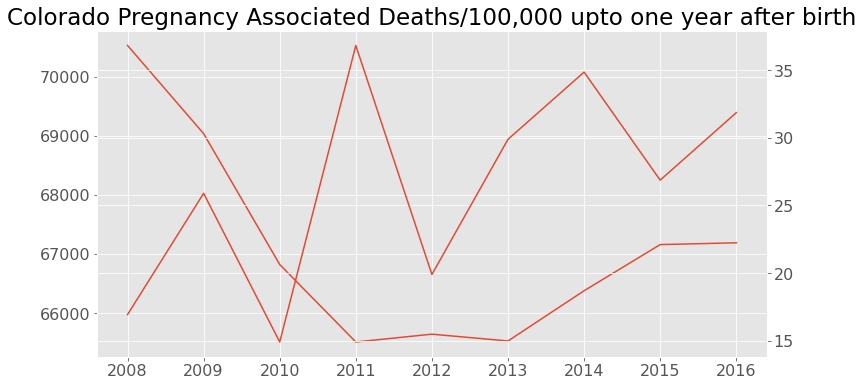

In [196]:
fig, ax = plt.subplots(figsize=(12,6))
x= colorado['Years'] 
y0= colorado['Births in Colorado']
y1= colorado['deaths']
ax.plot(x,y0)
ax2 =ax.twinx()
ax2.plot(x,y1)
ax.set_title('Colorado Pregnancy Associated Deaths/100,000 upto one year after birth')
plt.show

In [232]:
!pwd


/Users/willsullivan/Documents/SDOH_capstone/data/raw


# Cause of Deaths


In [335]:
cause = pd.read_csv('CU_Anschutz_maternal-mortality-in-colorado-2014-2016 23.csv', index_col=False )
cause = cause.drop(10,axis=0)
cause

,Cause of death,Number of pregnancy- associated deaths,Percentage of pregnancy-associated deaths
0,Suicide,16.0,17.0%
1,Drug overdose,13.0,13.8%
2,Injury (including motor vehicle crash),10.0,10.6%
3,Homicide,8.0,8.5%
4,Cardiac conditions,7.0,7.4%
5,All other obstetric complications (hypertensiv...,7.0,7.4%
6,Sepsis/infection,6.0,6.4%
7,Cerebrovascular accident (stroke),5.0,5.3%
8,Thrombotic pulmonary embolism,5.0,5.3%
9,All other non-obstetric medical causes of deat...,17.0,18.1%


In [287]:
cause['Cause of death'] = ['Suicide', 'Drug overdose', 'Injury/Accident', 'Homicide', 'Cardiac', 'Pregnancy disorders', 'Infection', 'Stroke', 'Blood clot', 'ther non-medical']


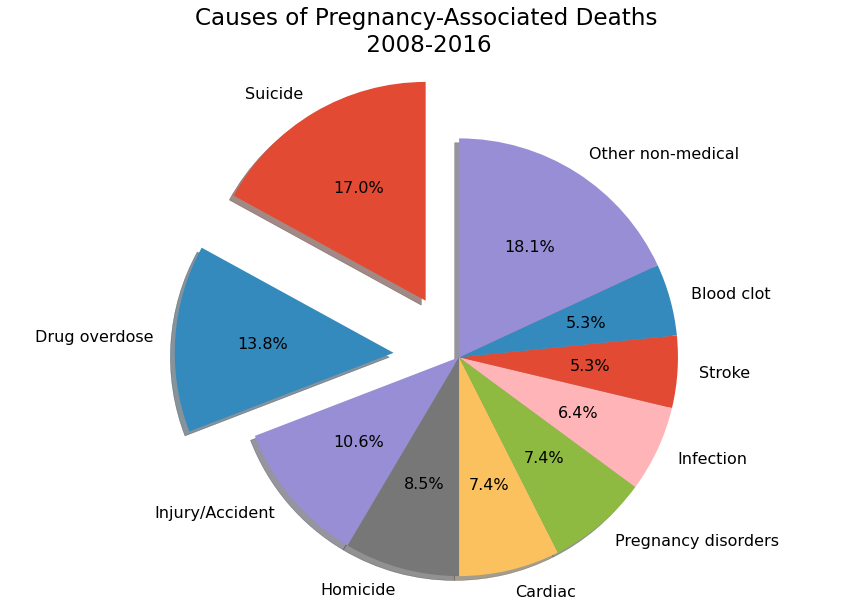

In [291]:
labels = cause['Cause of death']
sizes = cause['Number of pregnancy- associated deaths']
explode = (0.3,0.3,0,0,0,0,0,0,0,0)

fig, ax=plt.subplots(figsize=(15,10))
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Causes of Pregnancy-Associated Deaths\n 2008-2016')
plt.show()